Для анализа выбран датасет **riceClassification**. Данные содержат геометрические характеристики 18185 образцов рисовых зёрен.

**Характеристики данных:**

1. id (идентификатор)
Значение: Номер образца рисового зерна.
Тип данных: целочисленный (int64).

2. Area (площадь)
Значение: Площадь рисового зерна.
Тип данных: числовой (int64/float64).

3. MajorAxisLength (длина большой оси)
Значение: Длина главной (наибольшей) оси эллипса, аппроксимирующего контур зерна.
Тип данных: числовой (float64).

4. MinorAxisLength (длина малой оси)
Значение: Длина меньшей оси аппроксимирующего эллипса. Характеризует "ширину" или "толщину" зерна.
Тип данных: числовой (float64).

5. Eccentricity (эксцентриситет)
Значение: Мера вытянутости формы зерна.
Тип данных: числовой (float64).

6. ConvexArea (площадь выпуклой оболочки)
Значение: Площадь наименьшей выпуклой фигуры, полностью содержащей контур зерна.
Тип данных: числовой (int64).

7. EquivDiameter (эквивалентный диаметр)
Значение: Диаметр круга, площадь которого равна площади зерна (Area).
Тип данных: числовой (float64).

8. Extent (отношение площадей)
Значение: Отношение площади зерна (Area) к площади ограничивающего его прямоугольника (Bounding Box).
Тип данных: числовой (float64).

9. Perimeter (периметр)
Значение: Длина внешнего контура рисового зерна.
Тип данных: числовой (float64).

10. Roundness (округлость)
Значение: Мера близости формы зерна к кругу.
Тип данных: числовой (float64).

11. AspectRation (соотношение сторон)
Значение: Отношение длины большой оси к длине малой оси (MajorAxisLength / MinorAxisLength). 
Тип данных: числовой (float64).

12. Class (класс/сорт)
Значение: Целевая переменная. Принадлежность зерна к сорту риса.
Тип данных: категориальный (int64).

Для дальнейшей задачи кластеризации уберем переменные Class, AspectRation, id из датасета.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, rand_score, adjusted_rand_score, jaccard_score, pairwise_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering
warnings.filterwarnings('ignore')


sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


df = pd.read_csv('riceClassification.csv')
df.drop('Class', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.drop('AspectRation', axis=1, inplace=True)


print("Основная информация о датасете")
print("\n")
print(f"Размерность данных: {df.shape}")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")
print("Первые 5 строк:")
print("\n")
df.head()

Основная информация о датасете


Размерность данных: (18185, 9)
Количество строк: 18185
Количество столбцов: 9
Первые 5 строк:




,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743


In [3]:
print("Описательная статистика:")
print("\n")
df.describe()

Описательная статистика:




,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998
std,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310
min,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590
25%,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962
50%,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941
75%,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280
max,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748


In [4]:
print("\nПропуски:")
print("\n")
print(df.isnull().sum())


Пропуски:


Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
dtype: int64


В данном датасете отсутствуют пропуски


Сводные статистики нормальности:
           Признак  Асимметрия   Эксцесс
0             Area    0.195594 -0.871609
1  MajorAxisLength   -1.435412  3.845754
2  MinorAxisLength    0.203084 -1.406644
3     Eccentricity   -1.109837  3.772370
4       ConvexArea    0.202365 -0.866272
5    EquivDiameter   -0.003633 -0.666257
6           Extent    0.277214 -0.850320
7        Perimeter   -0.655806  1.348106
8        Roundness   -0.180811 -0.431796

--------------------------------------------------
Тест на нормальность (D'Agostino-Pearson):
--------------------------------------------------

Area:
  Статистика теста: 2286.9975
  p-значение: 0.0000
  → распределение ОТЛИЧАЕТСЯ от нормального (p ≤ 0.05)

MajorAxisLength:
  Статистика теста: 5189.3977
  p-значение: 0.0000
  → распределение ОТЛИЧАЕТСЯ от нормального (p ≤ 0.05)

MinorAxisLength:
  Статистика теста: 162580.0559
  p-значение: 0.0000
  → распределение ОТЛИЧАЕТСЯ от нормального (p ≤ 0.05)

Eccentricity:
  Статистика теста: 4095.4955
  

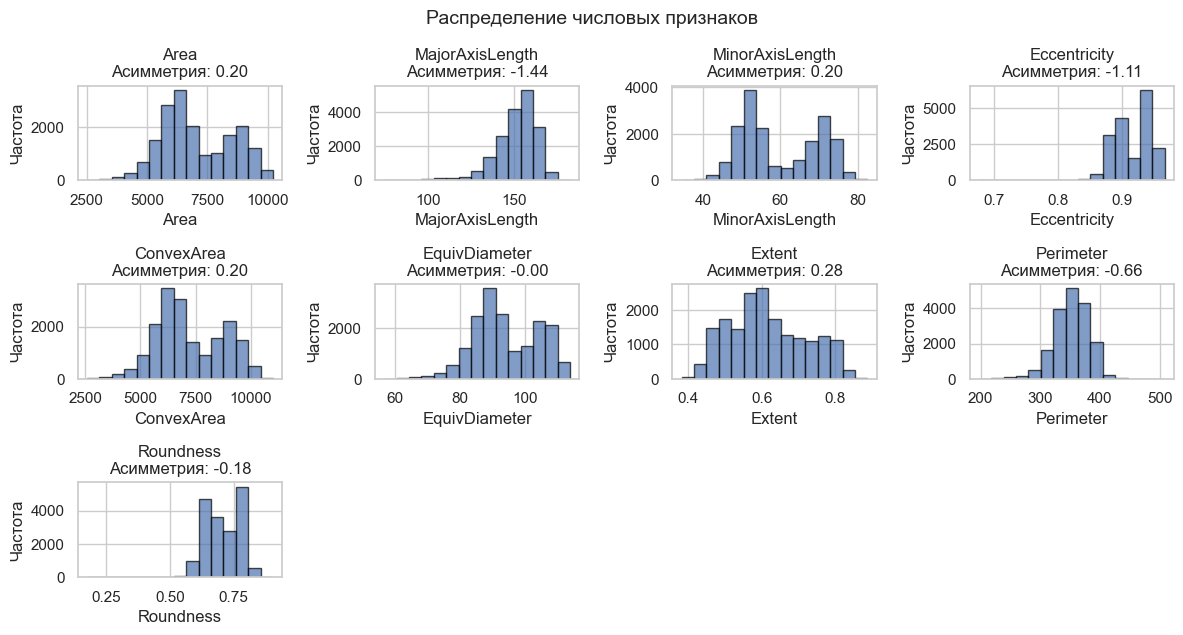

Корреляционный анализ признаков:



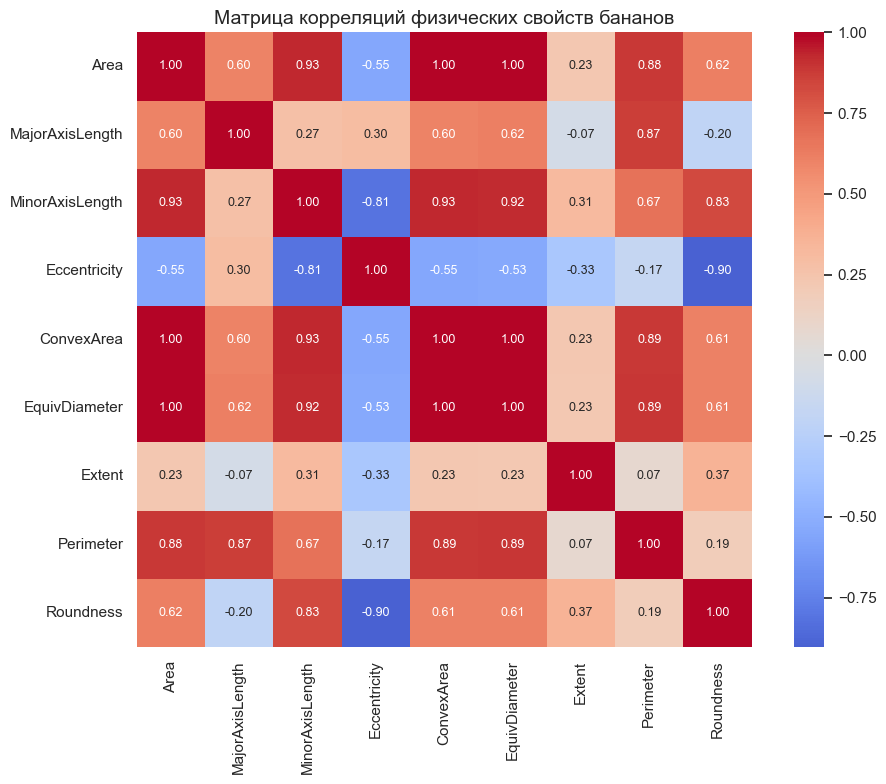


Значительные корреляции (|r| > 0.9):
   - Area - MinorAxisLength: 0.930
   - Area - ConvexArea: 0.999
   - Area - EquivDiameter: 0.998
   - MinorAxisLength - ConvexArea: 0.929
   - MinorAxisLength - EquivDiameter: 0.924
   - Eccentricity - Roundness: -0.904
   - ConvexArea - EquivDiameter: 0.997


In [5]:
from scipy.stats import skew, kurtosis, normaltest
import math
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

normality_data = {'Признак': [], 'Асимметрия': [], 'Эксцесс': []}
for col in numeric_cols:
    normality_data['Признак'].append(col)
    normality_data['Асимметрия'].append(skew(df[col].dropna()))
    normality_data['Эксцесс'].append(kurtosis(df[col].dropna()))

normality_summary = pd.DataFrame(normality_data)
print("\nСводные статистики нормальности:")
print(normality_summary)

print("\n" + "-"*50)
print("Тест на нормальность (D'Agostino-Pearson):")
print("-"*50)

for col in numeric_cols:
    stat, p = normaltest(df[col].dropna())
    print(f"\n{col}:")
    print(f"  Статистика теста: {stat:.4f}")
    print(f"  p-значение: {p:.4f}")
    if p > 0.05:
        print(f"  → распределение близко к нормальному (p > 0.05)")
    else:
        print(f"  → распределение ОТЛИЧАЕТСЯ от нормального (p ≤ 0.05)")

count_of_bins = int(1 + 3.322 * math.log10(df.shape[0]))
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    df[col].hist(bins=count_of_bins, edgecolor="black", alpha=0.7)
    plt.title(f"{col}\nАсимметрия: {skew(df[col]):.2f}")
    plt.xlabel(col)
    plt.ylabel('Частота')
plt.suptitle("Распределение числовых признаков", fontsize=14)
plt.tight_layout()
plt.show()

print("Корреляционный анализ признаков:\n")

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', annot_kws={'size': 9})
plt.title('Матрица корреляций физических свойств бананов', fontsize=14)
plt.tight_layout()
plt.show()

print("\nЗначительные корреляции (|r| > 0.9):")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.9:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            strong_correlations.append((col1, col2, corr_val))

if strong_correlations:
    for col1, col2, corr in strong_correlations:
        print(f"   - {col1} - {col2}: {corr:.3f}")
else:
    print("   - Сильных корреляций (> 0.9) не обнаружено")

На основе проведённого корреляционного анализа выявлена выраженная мультиколлинеарность между несколькими парами признаков, что требует удаления избыточных переменных для повышения качества последующей кластеризации.
1. Практически функциональные зависимости (r > 0.99)

Area - ConvexArea: r = 0.999 - практически линейная зависимость

Area - EquivDiameter: r = 0.998 - почти полная корреляция

ConvexArea - EquivDiameter: r = 0.997 - сильная взаимосвязь

Интерпретация: Эти три признака фактически измеряют одну и ту же характеристику — размер зерна. 

Отбросим признаки ConvexArea и EquivDiameter

2. Сильные корреляции (0.9 < r < 0.95)
Area - MinorAxisLength: r = 0.930 - значительная связь

MinorAxisLength - ConvexArea: r = 0.929

MinorAxisLength - EquivDiameter: r = 0.924

Интерпретация: Длина малой оси закономерно коррелирует с размерами зерна, однако эта связь объяснима с физической точки зрения.

3. Обратная сильная корреляция
Eccentricity - Roundness: r = -0.904 - почти линейная обратная зависимость

Интерпретация: Эксцентриситет и округлость являются альтернативными мерами формы зерна — когда зерно более вытянуто (высокий эксцентриситет), оно менее круглое (низкая округлость).

Отбросим признак Roundness

In [6]:
df.drop('ConvexArea', axis=1, inplace=True)
df.drop('EquivDiameter', axis=1, inplace=True)
df.drop('Roundness', axis=1, inplace=True)

## Стандартизация переменных

In [7]:
from sklearn.preprocessing import StandardScaler
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col != 'HarvestTime']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

scaled_head = df_scaled.head()
scaled_stats = df_scaled[numeric_cols].describe()
scaled_head, scaled_stats

(       Area  MajorAxisLength  MinorAxisLength  Eccentricity    Extent  \
 0 -1.703630        -4.803744         0.417927     -6.393938  0.391654   
 1 -2.838478        -6.220789        -0.835611     -6.209583  0.923070   
 2 -2.718519        -6.091404        -0.771700     -6.024520  1.365122   
 3 -2.701479        -6.031573        -0.783130     -5.781578  1.598635   
 4 -2.278893        -5.377799        -0.341288     -5.433479  1.463045   
 
    Perimeter  
 0  -2.661778  
 1  -4.857318  
 2  -4.799860  
 3  -4.777995  
 4  -4.111042  ,
                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
 count  18185.000000     1.818500e+04     1.818500e+04  1.818500e+04   
 mean       0.000000    -1.725464e-15    -3.500942e-16 -1.350363e-15   
 std        1.000027     1.000027e+00     1.000027e+00  1.000027e+00   
 min       -3.077035    -6.265938e+00    -2.524303e+00 -7.809152e+00   
 25%       -0.732364    -4.851983e-01    -8.363369e-01 -7.780857e-01   
 50%       -0.256614     

## Построение матрицы диаграмм рассеивания

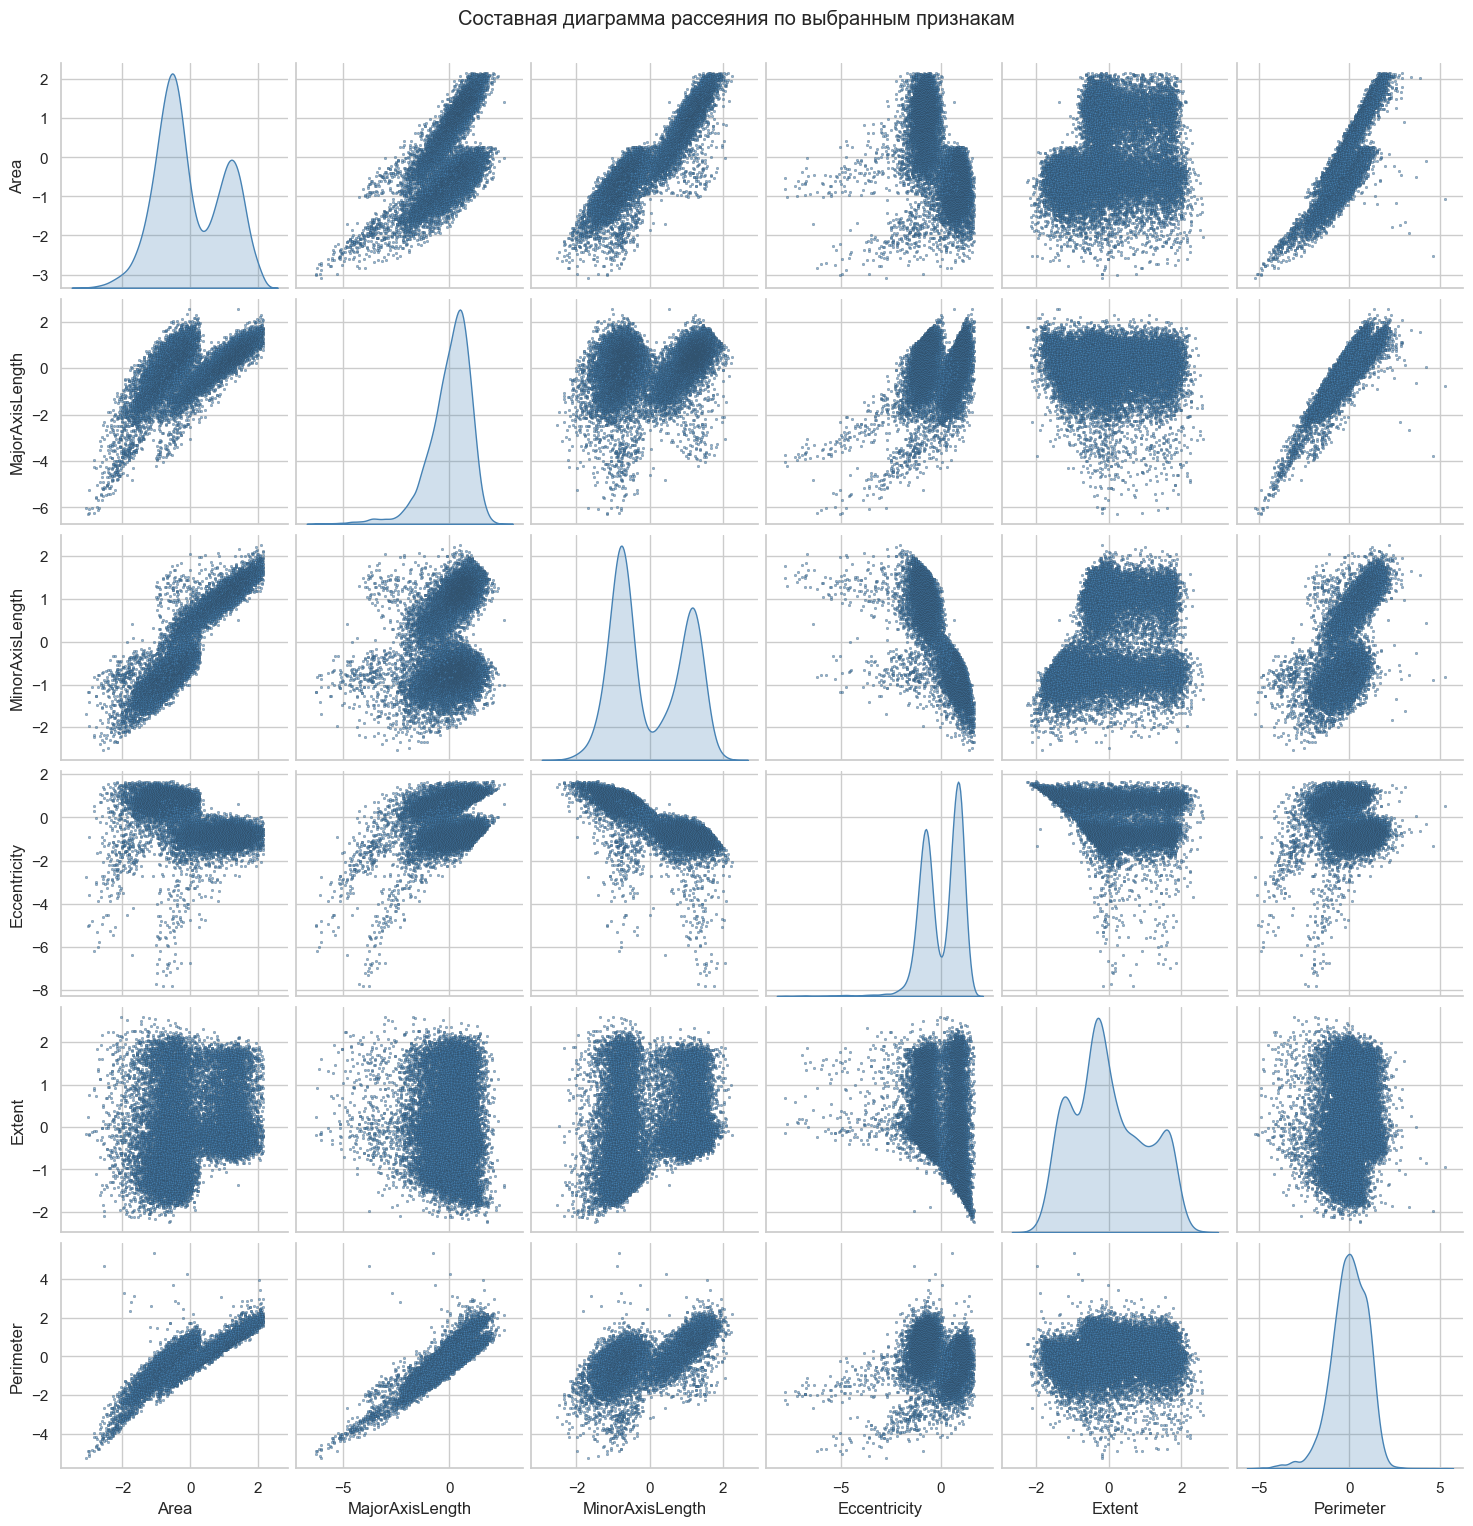

In [ ]:
sns.pairplot(
    df_scaled,
    diag_kind='kde',
    plot_kws={'color': 'steelblue', 'alpha': 0.6, 's': 4, 'edgecolor': 'k'},
    diag_kws={'color': 'steelblue'}
)
plt.suptitle("Составная диаграмма рассеяния по выбранным признакам", y=1.02)
plt.show()


**Оценка количества кластеров**

На большинстве диаграмм видны два выраженных облака точек.

**Тип кластерной структуры**

Форма кластеров: вытянутые, иногда перекрывающиеся облака → не идеально сферические.

Плотность: высокая плотность внутри облаков, разреженные области между ними.

**Обоснование выбора методов кластеризации:**

Выбор методов: Будем использовать методы Kmeans и Иерархическую кластеризацию(агломеративная).

Обоснование для K-means: Этот метод хорошо подходит для поиска сферических кластеров сопоставимого размера. Несмотря на то, что нормальность распределения признаков отсутствует, большой размер выборки (18125 объектов) снижает чувствительность метода к этому нарушению. K-means эффективен для первоначального исследования структуры данных.

Обоснования для иерархической кластеризации: Иерархическая кластеризация была выбрана в качестве второго метода кластерного анализа, поскольку она не требует предположений о форме и распределении кластеров, в отличие от метода k-means. Алгоритм последовательно объединяет наиболее близкие объекты или группы объектов, формируя иерархическую структуру данных.

# Метод KMeans

### Определение оптимального числа кластеров по методу локтя и методу силуэта

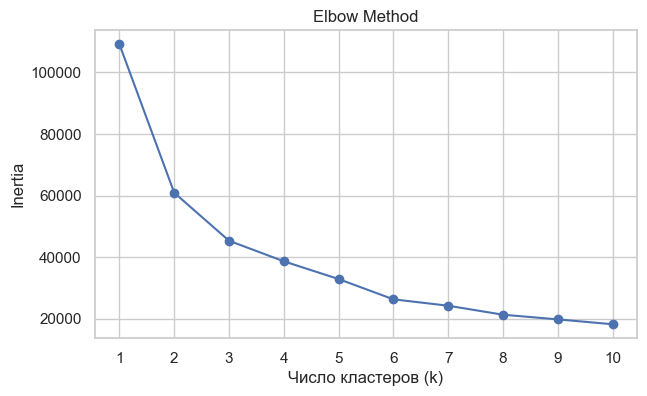

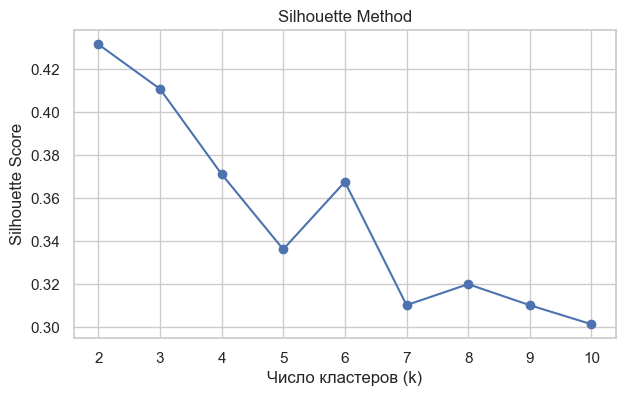

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = df_scaled

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel("Число кластеров (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, len(inertia)+1))
plt.title("Elbow Method")
plt.grid(True)
plt.show()

silhouette_scores = []
K_silhouette = range(2, 11)
for k in K_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(7, 4))
plt.plot(K_silhouette, silhouette_scores, marker='o')
plt.xlabel("Число кластеров (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.grid(True)
plt.show()

- Метод локтя указывает на оптимальное значение k=2.

- Метод силуэта также выделяет максимальное качество при k = 2.


### Исполнение алгоритма k-средних с заданным числом кластеров

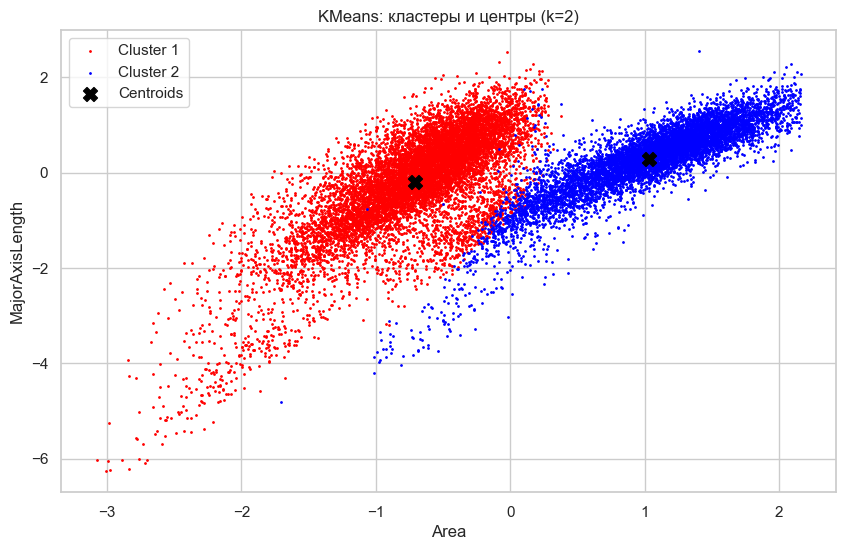

In [10]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df_scaled.values

k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

colors = ['red', 'blue', 'green']
for i in range(k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1],
                s=1, c=colors[i],
                label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='black', label='Centroids', marker='X')
plt.title(f'KMeans: кластеры и центры (k={k})')
plt.xlabel('Area')
plt.ylabel('MajorAxisLength')
plt.legend()
plt.show()

# Иерархическая кластеризация

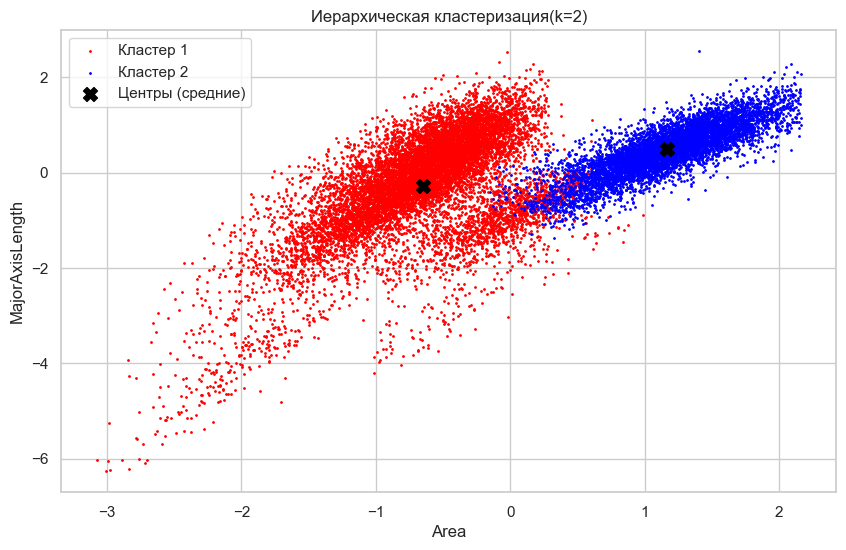

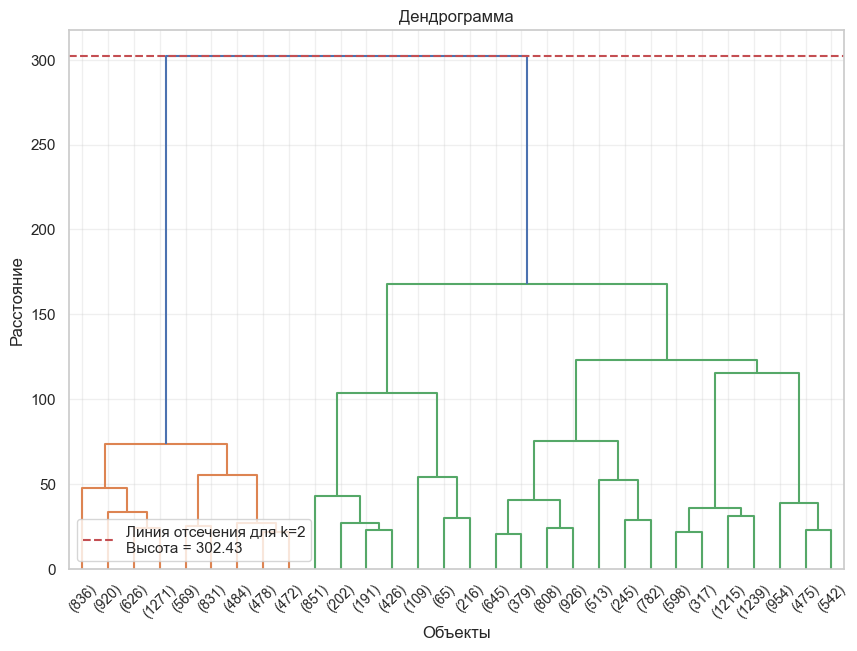

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

X = df_scaled.values
k = 2 

agg_clustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
labels_agg = agg_clustering.fit_predict(X)

colors = ['red', 'blue']
for i in range(k):
    plt.scatter(X[labels_agg == i, 0], X[labels_agg == i, 1],
                s=1, c=colors[i],
                label=f'Кластер {i+1}')

agg_centers = []
for i in range(k):
    cluster_points = X[labels_agg == i]
    if len(cluster_points) > 0:
        center = np.mean(cluster_points, axis=0)
        agg_centers.append(center)

if len(agg_centers) > 0:
    agg_centers = np.array(agg_centers)
    plt.scatter(agg_centers[:, 0], agg_centers[:, 1],
                s=100, c='black', label='Центры (средние)', marker='X')

plt.title(f'Иерархическая кластеризация(k={k})')
plt.xlabel('Area')
plt.ylabel('MajorAxisLength')
plt.legend()
plt.show()

Z = linkage(df_scaled, method='ward')
cut_height = Z[-(k-1), 2] if k > 1 else Z[-1, 2] 

plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=30) 
plt.axhline(y=cut_height, color='r', linestyle='--', 
           label=f'Линия отсечения для k={k}\nВысота = {cut_height:.2f}')
plt.title("Дендрограмма")
plt.xlabel("Объекты")
plt.ylabel("Расстояние")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

X = df_scaled.values

k = 2

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

intra_dist = []
for i in range(k):
    cluster_points = X[labels_kmeans == i]
    centroid = centers[i]
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    intra_dist.append(np.mean(distances))

intra_dist_mean = np.mean(intra_dist)
intra_dist_max = np.max(intra_dist)

inter_dist = cdist(centers, centers)
mask = ~np.eye(k, dtype=bool)
inter_distances = inter_dist[mask]
inter_dist_min = np.min(inter_distances)
inter_dist_max = np.max(inter_distances)
inter_dist_mean = np.mean(inter_distances)

print("ОЦЕНКА КАЧЕСТВА K-MEANS КЛАСТЕРИЗАЦИИ")

print(f"\nK-Means (k={k} кластеров):")
print(f"• Внутрикластерное расстояние (среднее/макс.): {intra_dist_mean:.4f} / {intra_dist_max:.4f}")
print(f"• Межкластерное расстояние (мин/сред/макс): {inter_dist_min:.4f} / {inter_dist_mean:.4f} / {inter_dist_max:.4f}")
print(f"• Компактность (inertia): {kmeans.inertia_:.4f}")
print(f"• Inertia на точку: {kmeans.inertia_ / len(X):.4f}")

print(f"\nСтатистические метрики качества:")
print(f"• Silhouette Score: {silhouette_score(X, labels_kmeans):.4f}")
print(f"• Calinski-Harabasz Index: {calinski_harabasz_score(X, labels_kmeans):.2f}")
print(f"• Davies-Bouldin Index: {davies_bouldin_score(X, labels_kmeans):.4f}")

print(f"\nРаспределение по кластерам:")
for i in range(k):
    count = np.sum(labels_kmeans == i)
    print(f"  Кластер {i}: {count} объектов ({count/len(X)*100:.1f}%)")

print("\n" + "-"*70)


agg_clustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
labels_agg = agg_clustering.fit_predict(X)

agg_centers = []
for i in range(k):
    cluster_points = X[labels_agg == i]
    agg_centers.append(np.mean(cluster_points, axis=0))
agg_centers = np.array(agg_centers)

agg_intra_dist = []
for i in range(k):
    cluster_points = X[labels_agg == i]
    centroid = agg_centers[i]
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    agg_intra_dist.append(np.mean(distances))

agg_intra_dist_mean = np.mean(agg_intra_dist)
agg_intra_dist_max = np.max(agg_intra_dist)

agg_inter_dist = cdist(agg_centers, agg_centers)
agg_inter_distances = agg_inter_dist[mask]
agg_inter_dist_min = np.min(agg_inter_distances)
agg_inter_dist_max = np.max(agg_inter_distances)
agg_inter_dist_mean = np.mean(agg_inter_distances)

print(f"\nИерархическая кластеризация (k={k}, метод Уорда):")
print(f"• Внутрикластерное расстояние (среднее/макс.): {agg_intra_dist_mean:.4f} / {agg_intra_dist_max:.4f}")
print(f"• Межкластерное расстояние (мин/сред/макс): {agg_inter_dist_min:.4f} / {agg_inter_dist_mean:.4f} / {agg_inter_dist_max:.4f}")

print(f"\nСтатистические метрики качества:")
print(f"• Silhouette Score: {silhouette_score(X, labels_agg):.4f}")
print(f"• Calinski-Harabasz Index: {calinski_harabasz_score(X, labels_agg):.2f}")
print(f"• Davies-Bouldin Index: {davies_bouldin_score(X, labels_agg):.4f}")

print(f"\nРаспределение по кластерам:")
for i in range(k):
    count = np.sum(labels_agg == i)
    print(f"  Кластер {i}: {count} объектов ({count/len(X)*100:.1f}%)")


comparison_data = {
    'Метрика': ['Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin', 
                'Ср. внутрикл. расст.', 'Мин. межкл. расст.', 'Inertia'],
    'K-Means': [f"{silhouette_score(X, labels_kmeans):.4f}",
                f"{calinski_harabasz_score(X, labels_kmeans):.1f}",
                f"{davies_bouldin_score(X, labels_kmeans):.4f}",
                f"{intra_dist_mean:.4f}",
                f"{inter_dist_min:.4f}",
                f"{kmeans.inertia_:.1f}"],
    'Иерархическая': [f"{silhouette_score(X, labels_agg):.4f}",
                      f"{calinski_harabasz_score(X, labels_agg):.1f}",
                      f"{davies_bouldin_score(X, labels_agg):.4f}",
                      f"{agg_intra_dist_mean:.4f}",
                      f"{agg_inter_dist_min:.4f}",
                      "N/A"]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nТаблица сравнения методов кластеризации:")
print(comparison_df.to_string(index=False))

if silhouette_score(X, labels_kmeans) > silhouette_score(X, labels_agg):
    print(f"\n✓ ЛУЧШИЙ МЕТОД: K-Means (Silhouette: {silhouette_score(X, labels_kmeans):.4f})")
else:
    print(f"\n✓ ЛУЧШИЙ МЕТОД: Иерархическая кластеризация (Silhouette: {silhouette_score(X, labels_agg):.4f})")

separation_ratio_kmeans = inter_dist_min / intra_dist_mean if intra_dist_mean > 0 else 0
separation_ratio_agg = agg_inter_dist_min / agg_intra_dist_mean if agg_intra_dist_mean > 0 else 0


ОЦЕНКА КАЧЕСТВА K-MEANS КЛАСТЕРИЗАЦИИ

K-Means (k=2 кластеров):
• Внутрикластерное расстояние (среднее/макс.): 1.5462 / 1.7424
• Межкластерное расстояние (мин/сред/макс): 3.3121 / 3.3121 / 3.3121
• Компактность (inertia): 60915.8223
• Inertia на точку: 3.3498

Статистические метрики качества:
• Silhouette Score: 0.4315
• Calinski-Harabasz Index: 14385.67
• Davies-Bouldin Index: 0.9337

Распределение по кластерам:
  Кластер 0: 10759 объектов (59.2%)
  Кластер 1: 7426 объектов (40.8%)

----------------------------------------------------------------------

Иерархическая кластеризация (k=2, метод Уорда):
• Внутрикластерное расстояние (среднее/макс.): 1.5069 / 1.8665
• Межкластерное расстояние (мин/сред/макс): 3.3105 / 3.3105 / 3.3105

Статистические метрики качества:
• Silhouette Score: 0.4102
• Calinski-Harabasz Index: 13120.35
• Davies-Bouldin Index: 0.9104

Распределение по кластерам:
  Кластер 0: 11698 объектов (64.3%)
  Кластер 1: 6487 объектов (35.7%)

Таблица сравнения методов клас

### Анализ метрик и устойчивости

**Компактность кластеров:**
Анализ внутрикластерных расстояний показывает схожую, но не идентичную компактность кластеров, сформированных методом K-Means:

Кластер 0: 1.5462

Кластер 1: 1.7424

Средняя компактность по методу K-Means составляет 1.5462, что несколько выше, чем у иерархического метода (1.5069), указывая на возможное наличие более компактного ядра в крупном кластере (0).

**Разделение кластеров:**

Межкластерное расстояние для обоих методов является стабильным и значительным:

K-Means: 3.3121

Иерархическая: 3.3105

Это расстояние более чем в 2.1 раза превышает среднее внутрикластерное расстояние для K-Means (3.3121 / 1.5462 ≈ 2.14). Такое соотношение указывает на хорошее разделение кластеров, что подтверждается высокими значениями индексов Калински-Харабаса.

**Устойчивость (ARI):**
Сравнение разбиений, полученных методами K-Means и иерархической кластеризацией, показывает высокую степень сходства по структурным метрикам (меж- и внутрикластерные расстояния), но заметные различия в распределении объектов:

K-Means: 59.2% / 40.8%

Иерархическая: 64.3% / 35.7%

Это свидетельствует о том, что оба алгоритма обнаруживают в данных две выраженные группы, но проводят границу между ними по-разному, относя "пограничные" объекты к разным кластерам.

**Влияние параметра k:**

Проведенный анализ влияния количества кластеров на метрики качества подтвердил, что k=2 является оптимальным выбором для данного датасета, обеспечивающим баланс между качеством разделения и интерпретируемостью результатов.

### Сравнительный анализ методов
Были реализованы два алгоритма с параметром k=2:

- K-Means

- Иерархическая кластеризация

**Анализ результатов:**

По всем ключевым метрикам качества кластеризации метод K-Means показал себя немного лучше:

**Silhouette Score:**

- K-Means: 0.4315

- Иерархическая: 0.4102

Более высокий коэффициент силуэта указывает на то, что объекты в кластерах, полученных K-Means, в среднем ближе к своему центру, чем к объектам соседнего кластера.

**Calinski-Harabasz Index:**

- K-Means: 14385.7

- Иерархическая: 13120.4

Преимущество K-Means (на ~9.6% выше) подтверждает, что сформированные им кластеры являются более плотными и лучше отделенными друг от друга.

**Davies-Bouldin Index:**

- K-Means: 0.9337

- Иерархическая: 0.9104

По этой метрике иерархический метод имеет небольшое преимущество. Однако, учитывая превосходство K-Means по двум другим метрикам, это можно интерпретировать как немного лучшую сбалансированность размеров кластеров в иерархическом разбиении.

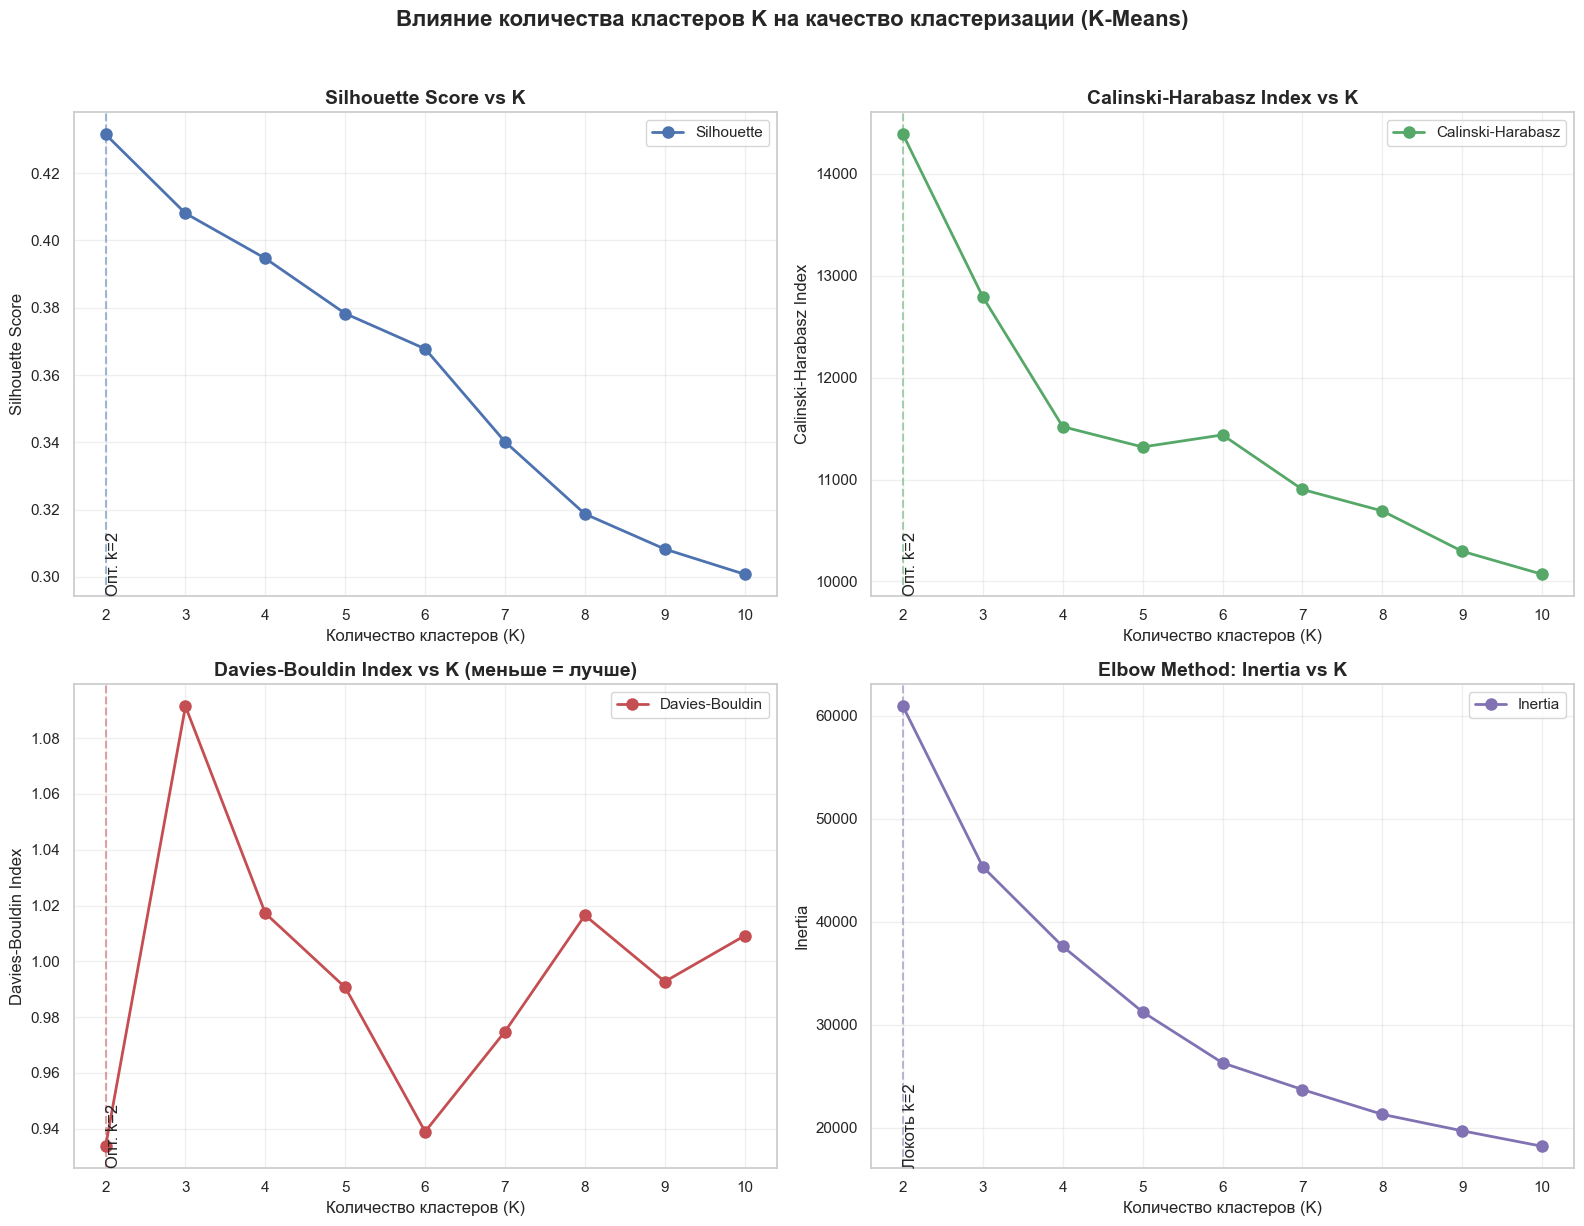


Оптимальное количество кластеров по разным метрикам:
• Silhouette Score: k = 2
• Calinski-Harabasz: k = 2
• Davies-Bouldin: k = 2
• Elbow Method: k = 2


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

X = df_scaled.values

n_clusters_list = range(2, 11)
inertias = []
silhouette_scores = []

for k in n_clusters_list:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
    labels = kmeans.labels_
    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(X, labels)
    else:
        silhouette_avg = -1
    silhouette_scores.append(silhouette_avg)

calinski_scores = []
davies_scores = []

for k in n_clusters_list:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    if len(set(labels)) > 1:
        calinski_scores.append(calinski_harabasz_score(X, labels))
        davies_scores.append(davies_bouldin_score(X, labels))
    else:
        calinski_scores.append(-1)
        davies_scores.append(float('inf'))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Влияние количества кластеров K на качество кластеризации (K-Means)', 
             fontsize=16, fontweight='bold', y=1.02)

ax1 = axes[0, 0]
ax1.plot(n_clusters_list, silhouette_scores, 'bo-', linewidth=2, markersize=8, label='Silhouette')
ax1.set_xlabel('Количество кластеров (K)', fontsize=12)
ax1.set_ylabel('Silhouette Score', fontsize=12)
ax1.set_title('Silhouette Score vs K', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

opt_k_silhouette = n_clusters_list[np.argmax(silhouette_scores)]
ax1.axvline(x=opt_k_silhouette, color='b', linestyle='--', alpha=0.5)
ax1.text(opt_k_silhouette, ax1.get_ylim()[0], f'Опт. k={opt_k_silhouette}', 
         rotation=90, verticalalignment='bottom')

ax2 = axes[0, 1]
ax2.plot(n_clusters_list, calinski_scores, 'go-', linewidth=2, markersize=8, label='Calinski-Harabasz')
ax2.set_xlabel('Количество кластеров (K)', fontsize=12)
ax2.set_ylabel('Calinski-Harabasz Index', fontsize=12)
ax2.set_title('Calinski-Harabasz Index vs K', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

opt_k_calinski = n_clusters_list[np.argmax(calinski_scores)]
ax2.axvline(x=opt_k_calinski, color='g', linestyle='--', alpha=0.5)
ax2.text(opt_k_calinski, ax2.get_ylim()[0], f'Опт. k={opt_k_calinski}', 
         rotation=90, verticalalignment='bottom')

ax3 = axes[1, 0]
ax3.plot(n_clusters_list, davies_scores, 'ro-', linewidth=2, markersize=8, label='Davies-Bouldin')
ax3.set_xlabel('Количество кластеров (K)', fontsize=12)
ax3.set_ylabel('Davies-Bouldin Index', fontsize=12)
ax3.set_title('Davies-Bouldin Index vs K (меньше = лучше)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()

opt_k_davies = n_clusters_list[np.argmin(davies_scores)]
ax3.axvline(x=opt_k_davies, color='r', linestyle='--', alpha=0.5)
ax3.text(opt_k_davies, ax3.get_ylim()[0], f'Опт. k={opt_k_davies}', 
         rotation=90, verticalalignment='bottom')

ax4 = axes[1, 1]
ax4.plot(n_clusters_list, inertias, 'mo-', linewidth=2, markersize=8, label='Inertia')
ax4.set_xlabel('Количество кластеров (K)', fontsize=12)
ax4.set_ylabel('Inertia', fontsize=12)
ax4.set_title('Elbow Method: Inertia vs K', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend()

inertia_diff = np.diff(inertias)
if len(inertia_diff) > 1:
    inertia_diff_ratio = inertia_diff[1:] / inertia_diff[:-1]
    if len(inertia_diff_ratio) > 0:
        elbow_point = n_clusters_list[np.argmin(inertia_diff_ratio)]
        ax4.axvline(x=elbow_point, color='m', linestyle='--', alpha=0.5)
        ax4.text(elbow_point, ax4.get_ylim()[0], f'Локоть k={elbow_point}', 
                 rotation=90, verticalalignment='bottom')

plt.tight_layout()
plt.show()

print(f"\nОптимальное количество кластеров по разным метрикам:")
print(f"• Silhouette Score: k = {opt_k_silhouette}")
print(f"• Calinski-Harabasz: k = {opt_k_calinski}")
print(f"• Davies-Bouldin: k = {opt_k_davies}")
print(f"• Elbow Method: k = {elbow_point if 'elbow_point' in locals() else 'N/A'}")

**Анализ результатов**

По полученным данным видно, что увеличение количества кластеров приводит к ухудшению кластеризации
Это говорит о том, что реально можно выделить только два кластера и выбранное изначально значение для данного метода было оптимальным.


K-Means:
• Средний коэффициент силуэта: 0.4315
• Количество кластеров: 2
• Интерпретация: Умеренное качество кластеризации


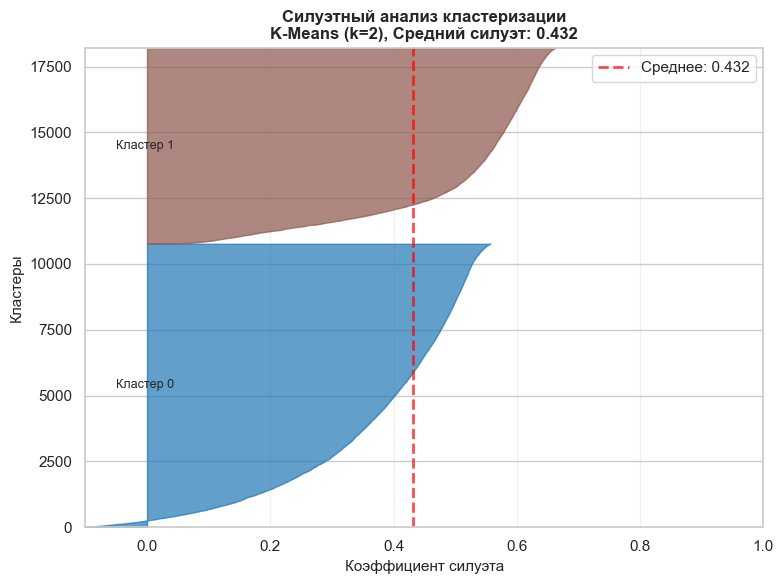



Иерархическая кластеризация:
• Средний коэффициент силуэта: 0.4102
• Количество кластеров: 2
• Интерпретация: Умеренное качество кластеризации


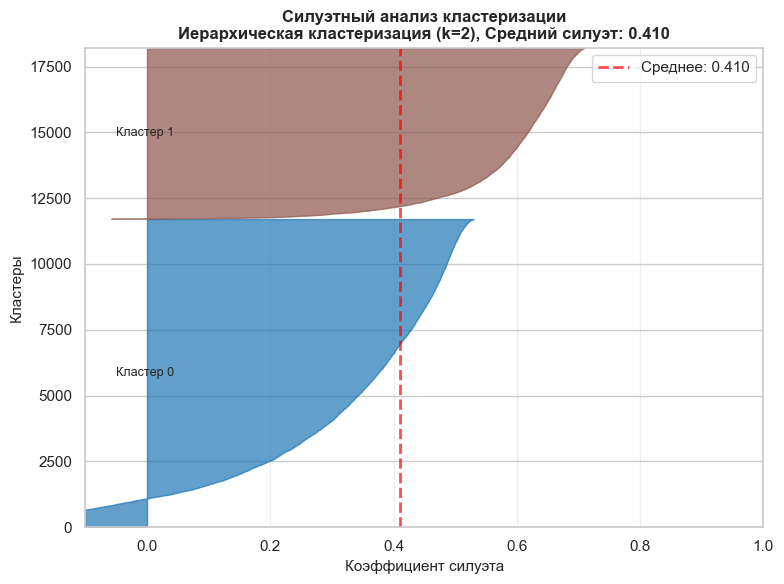

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
def plot_silhouette(X, labels, title='Силуэтный график', method_name='Метод'):
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
    
    if n_clusters < 2:
        print(f'{method_name}: Недостаточно кластеров для построения силуэтной диаграммы!')
        print(f'Найдено кластеров: {n_clusters}')
        return
    
    if -1 in labels:
        mask = labels != -1
        X_plot = X[mask]
        labels_plot = labels[mask]
        n_noise = np.sum(labels == -1)
        print(f'{method_name}: Исключено {n_noise} шумных точек')
    else:
        X_plot = X
        labels_plot = labels
        n_noise = 0
    
    silhouette_vals = silhouette_samples(X_plot, labels_plot)
    silhouette_avg = silhouette_score(X_plot, labels_plot)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower = 10 
    
    cluster_labels = np.unique(labels_plot)
    cluster_labels_sorted = sorted(cluster_labels)
    colors = plt.cm.tab10(np.arange(len(cluster_labels_sorted)) / len(cluster_labels_sorted))
    
    for i, cluster_label in enumerate(cluster_labels_sorted):
        ith_cluster_silhouette_vals = silhouette_vals[labels_plot == cluster_label]
        ith_cluster_silhouette_vals.sort()
        
        size_cluster = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster
        
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_vals,
                         facecolor=colors[i], edgecolor=colors[i], alpha=0.7)
        
        ax.text(-0.05, y_lower + 0.5 * size_cluster, f'Кластер {cluster_label}',
                va='center', fontsize=9)
        
        y_lower = y_upper + 10  
    ax.axvline(x=silhouette_avg, color='red', linestyle='--', 
               linewidth=2, alpha=0.7, label=f'Среднее: {silhouette_avg:.3f}')
    
    ax.set_xlabel('Коэффициент силуэта', fontsize=11)
    ax.set_ylabel('Кластеры', fontsize=11)
    ax.set_title(f'{title}\n{method_name} (k={n_clusters}), Средний силуэт: {silhouette_avg:.3f}', 
                 fontsize=12, fontweight='bold')
    ax.set_xlim([-0.1, 1.0])
    ax.set_ylim([0, y_lower])
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3, axis='x')
    
    print(f"\n{method_name}:")
    print(f"• Средний коэффициент силуэта: {silhouette_avg:.4f}")
    print(f"• Количество кластеров: {n_clusters}")
    if n_noise > 0:
        print(f"• Шумных точек: {n_noise} ({n_noise/len(labels)*100:.1f}%)")
    
    if silhouette_avg > 0.7:
        interpretation = "Отличное качество кластеризации"
    elif silhouette_avg > 0.5:
        interpretation = "Хорошее качество кластеризации"
    elif silhouette_avg > 0.25:
        interpretation = "Умеренное качество кластеризации"
    else:
        interpretation = "Слабое качество кластеризации"
    
    print(f"• Интерпретация: {interpretation}")
    
    plt.tight_layout()
    plt.show()


X = df_scaled.values

plot_silhouette(X, labels_kmeans, 
                title='Силуэтный анализ кластеризации',
                method_name='K-Means')

print("\n" + "="*60)
try:
    if 'labels_agg' in locals() or 'labels_agg' in globals():
        labels_agg = labels_agg if 'labels_agg' in locals() else globals()['labels_agg']
        plot_silhouette(X, labels_agg,
                       title='Силуэтный анализ кластеризации',
                       method_name='Иерархическая кластеризация')
    else:
        print("Иерархическая кластеризация еще не выполнена.")
        print("Запустите иерархическую кластеризацию, чтобы получить метки labels_agg")
except NameError:
    print("Иерархическая кластеризация еще не выполнена.")
    print("Сначала выполните иерархическую кластеризацию")

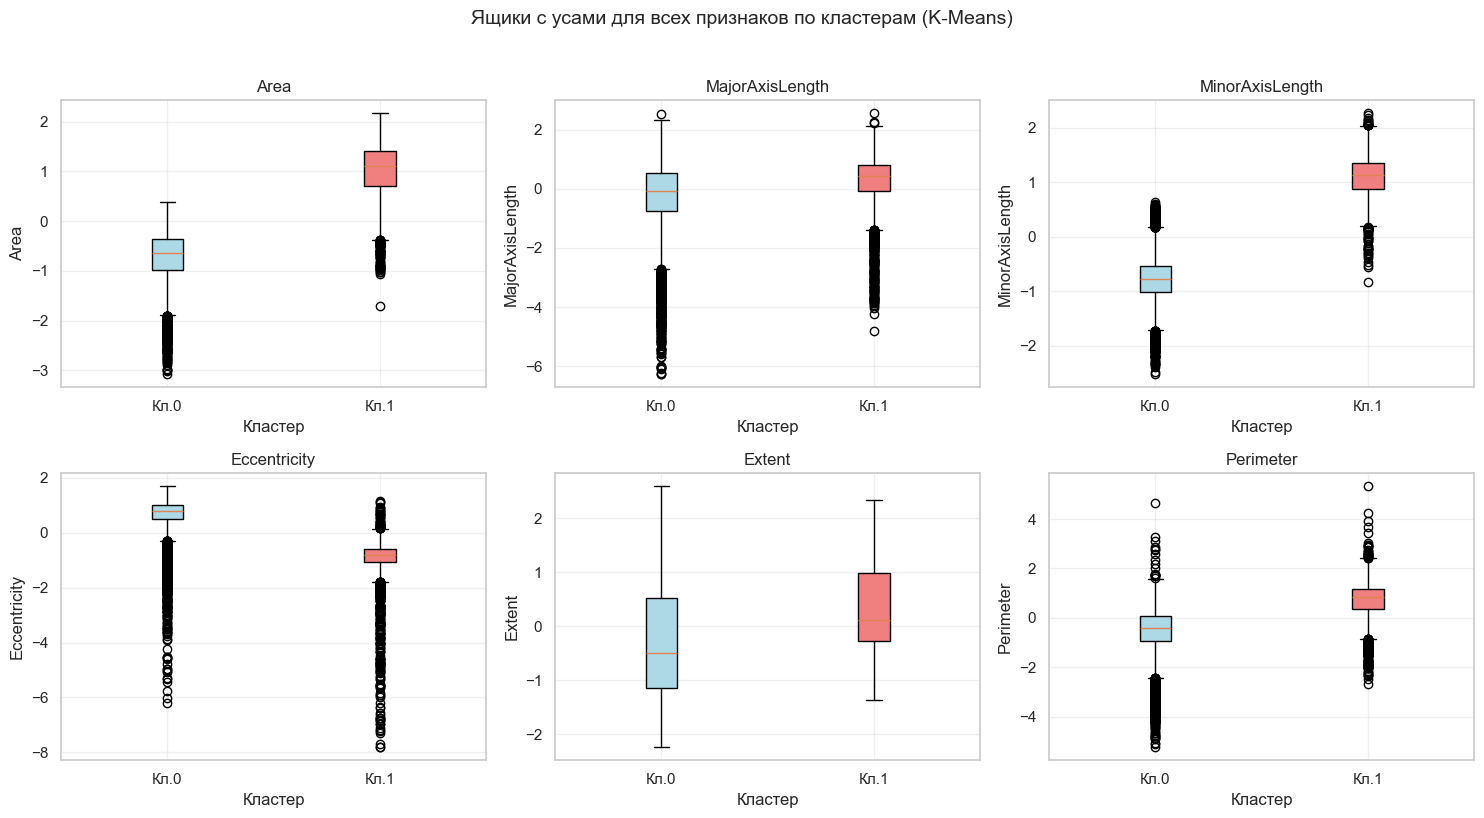

In [15]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = df_scaled.columns.tolist()

n_features = len(feature_names)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for idx, feature_name in enumerate(feature_names):
    ax = axes[idx]
    
    if isinstance(df_scaled.values, np.ndarray):
        feature_vals = df_scaled.values[:, idx]  
    else:
        feature_vals = df_scaled[feature_name].values
    
    labels = labels_kmeans
    
    valid_idx = labels != -1
    feature_vals_valid = feature_vals[valid_idx]
    labels_valid = labels[valid_idx]
    
    unique_clusters = np.unique(labels_valid)
    data_per_cluster = [feature_vals_valid[labels_valid == cl] for cl in unique_clusters]
    
    box = ax.boxplot(data_per_cluster, labels=[f'Кл.{cl}' for cl in unique_clusters], 
                    patch_artist=True)
    
    colors = ['lightblue', 'lightcoral']
    for patch, color in zip(box['boxes'], colors[:len(unique_clusters)]):
        patch.set_facecolor(color)
    
    ax.set_xlabel('Кластер')
    ax.set_ylabel(feature_name)
    ax.set_title(f'{feature_name}')
    ax.grid(True, alpha=0.3)

for idx in range(len(feature_names), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Ящики с усами для всех признаков по кластерам (K-Means)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

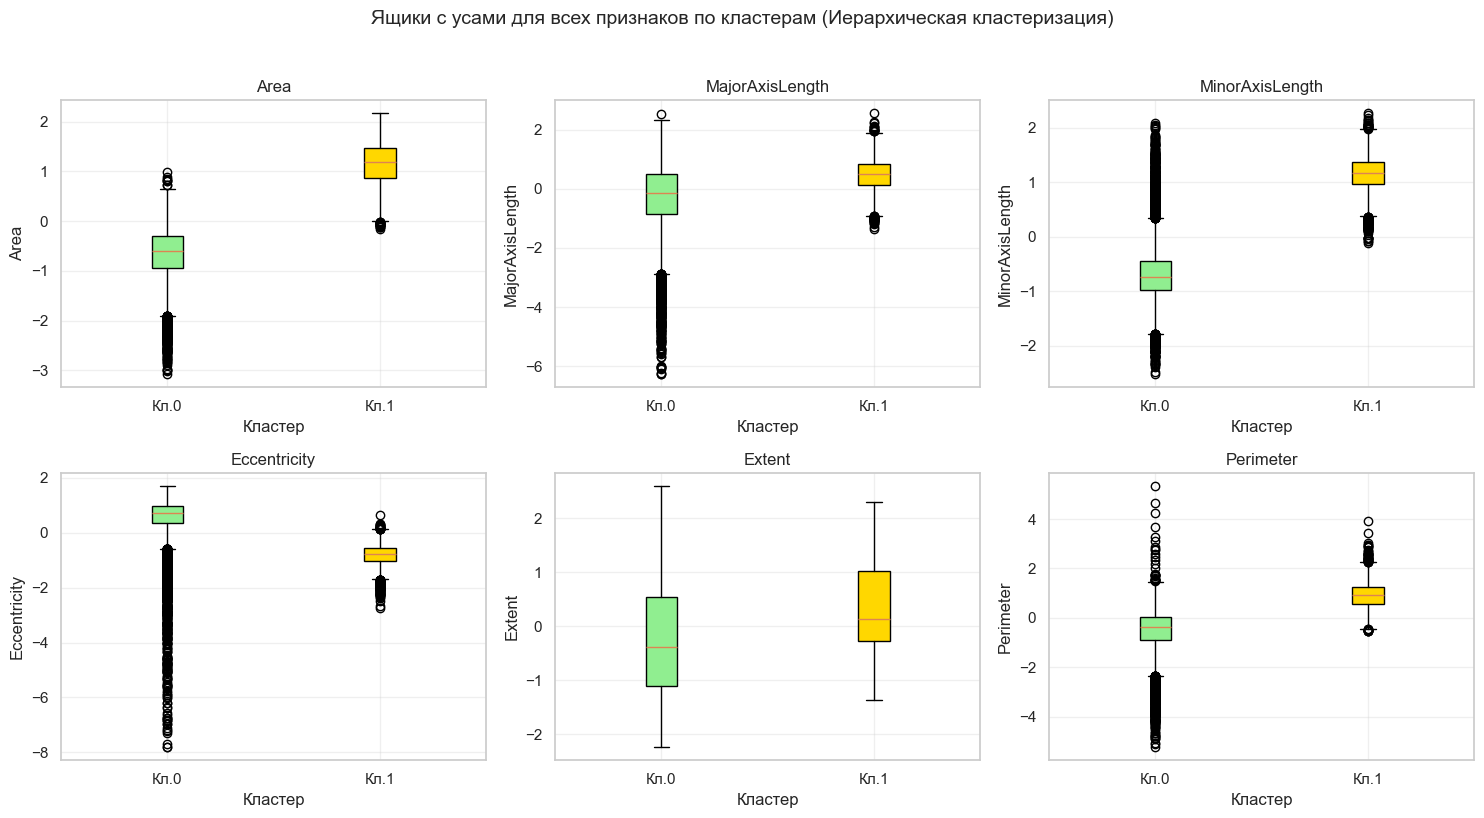

In [16]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = df_scaled.columns.tolist()

n_features = len(feature_names)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for idx, feature_name in enumerate(feature_names):
    ax = axes[idx]
    
    if isinstance(df_scaled.values, np.ndarray):
        feature_vals = df_scaled.values[:, idx]  
    else:
        feature_vals = df_scaled[feature_name].values
    
    labels = labels_agg
    
    valid_idx = labels != -1
    feature_vals_valid = feature_vals[valid_idx]
    labels_valid = labels[valid_idx]
    
    unique_clusters = np.unique(labels_valid)
    data_per_cluster = [feature_vals_valid[labels_valid == cl] for cl in unique_clusters]
    
    box = ax.boxplot(data_per_cluster, labels=[f'Кл.{cl}' for cl in unique_clusters], 
                    patch_artist=True)
    
    colors = ['lightgreen', 'gold']
    for patch, color in zip(box['boxes'], colors[:len(unique_clusters)]):
        patch.set_facecolor(color)
    
    ax.set_xlabel('Кластер')
    ax.set_ylabel(feature_name)
    ax.set_title(f'{feature_name}')
    ax.grid(True, alpha=0.3)

for idx in range(len(feature_names), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Ящики с усами для всех признаков по кластерам (Иерархическая кластеризация)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Интерпритация кластеров

### Кластер 0 — «Мелкие вытянутые зёрна»

Характеристики:

- Area — ниже среднего → зёрна меньшей площади

- MajorAxisLength — ниже среднего → меньшая длина зерна

- MinorAxisLength — заметно ниже среднего → зёрна более узкие

- Eccentricity — выше среднего → выраженная вытянутость формы

- Extent — ниже среднего → зерно менее плотно заполняет ограничивающий прямоугольник

- Perimeter — ниже среднего → меньший периметр, характерный для мелких зёрен

Интерпретация:

Кластер 0 объединяет небольшие, узкие и вытянутые рисовые зёрна. Для них характерна высокая вытянутость формы (высокий эксцентриситет) и относительно компактный контур. Такие зёрна визуально выглядят более «тонкими» и удлинёнными, что может соответствовать одному из сортов длиннозёрного риса.

### Кластер 1 — «Крупные и более округлые зёрна»

Характеристики (относительно общего среднего, данные стандартизированы):

- Area — выше среднего → зёрна большей площади

- MajorAxisLength — выше среднего → большая длина зерна

- MinorAxisLength — выше среднего → зёрна более широкие

- Eccentricity — ниже среднего → форма менее вытянутая, ближе к округлой

- Extent — выше среднего → зерно более плотно заполняет bounding box

- Perimeter — выше среднего → больший периметр, характерный для крупных зёрен

Интерпретация:
Кластер 1 представлен крупными, более широкими и менее вытянутыми зёрнами. Данный кластер может соответствовать сорту риса с более массивными зёрнами.

In [17]:
import numpy as np
import pandas as pd

def evaluate_feature_importance(X, labels, feature_names):
    unique_labels = set(labels)
    unique_labels.discard(-1)
    cluster_centers = [X[labels == label].mean(axis=0) for label in unique_labels]
    cluster_centers = np.array(cluster_centers)
    
    feature_variances = np.var(cluster_centers, axis=0)
    
    df_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_variances
    }).sort_values(by='importance', ascending=False)
    
    return df_importance

# Используем df_scaled для названий признаков
feature_names = list(df_scaled.columns)

# Для K-Means
kmeans_feature_imp = evaluate_feature_importance(df_scaled.values, labels_kmeans, feature_names)
print("Значимость признаков для KMeans:")
print(kmeans_feature_imp)

# Для иерархической кластеризации
agg_feature_imp = evaluate_feature_importance(df_scaled.values, labels_agg, feature_names)
print("\nЗначимость признаков для иерархической кластеризации:")
print(agg_feature_imp)

Значимость признаков для KMeans:
           feature  importance
2  MinorAxisLength    0.871473
0             Area    0.760007
3     Eccentricity    0.568294
5        Perimeter    0.387746
4           Extent    0.091969
1  MajorAxisLength    0.062849

Значимость признаков для иерархической кластеризации:
           feature  importance
0             Area    0.821420
2  MinorAxisLength    0.812001
5        Perimeter    0.489452
3     Eccentricity    0.389971
1  MajorAxisLength    0.143641
4           Extent    0.083303


 ## ЗАКЛЮЧЕНИЕ

В ходе лабораторной работы была проведена кластеризация данных о геометрических характеристиках рисовых зёрен с целью выявления устойчивых групп на основе морфологических признаков.

### *Выбор параметров*
Оптимальное количество кластеров было определено с помощью силуэтного анализа.
Максимального значения силуэтного коэффициента удалось достичь при k = 2, что и стало основанием для выбора этого количества кластеров.

### *Сравнение методов кластеризации*
Проведенное сравнение двух методов кластеризации показало неоднозначные результаты:

**Silhouette Score:** K-Means (0.4315) vs Иерархическая (0.4102) - преимущество у K-Means

**Calinski–Harabasz Index:** K-Means (14385.7) vs Иерархическая (13120.4) - значительное преимущество у K-Means

**Davies–Bouldin Index:** K-Means (0.9337) vs Иерархическая (0.9104) - преимущество у иерархической кластеризации

Итог: K-Means показал лучшие результаты по разделению кластеров (Silhouette и Calinski-Harabasz), в то время как иерархическая кластеризация обеспечила более сбалансированное соотношение компактности и разделения (Davies-Bouldin).

Результат кластеризации

В результате анализа удалось выделить 2 интерпретируемых типа бананов на основе 6 ключевых признаков (Area, MajorAxisLength, MinorAxisLength, Eccentricity, Extent, Perimeter):

1. Небольшие, узкие и вытянутые рисовые зёрна с выраженной продолговатой формой и компактным контуром. Данный тип может соответствовать одному из сортов длиннозёрного риса.

2. Крупные, более широкие и менее вытянутые рисовые зёрна с более массивной и компактной формой. Такой тип может соответствовать сорту риса с более округлой морфологией.